In [1]:
!pip install mysql-connector-python

In [2]:
#Data Mining - Making connection with mysql
import mysql.connector
#connect to server
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="password",
    database="empdb")

def Q(sql):
    res=pd.read_sql_query(sql,con)
    return(res)

res = Q("Select * from studmarks")
res.tail(10)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [3]:
#importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#study table first
res.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [5]:
res.tail()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [6]:
res.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [7]:
res.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [8]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [9]:
res.shape

(10, 11)

In [10]:
#Summary Stastics
res.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


Key Observation
1. The mean is more than meadan(50th percentile) in Maths, Physics, English , History columns.
2. The mean is less than meadan(50th percentile) in Chemistry, Biology, Economics, Civics columns.
3. There is diffrence present in 75% percentile and max  in Maths and Civics
4. So possible outliers present in Maths and Civics Column
5. name,Gender,DOB are object type we can drop that columns ( Gender we can change using label encoder or can drop too)

In [11]:
res.drop('Name', axis=1,inplace=True)
print(res.head())
print(res.shape)

  Gender         DOB  Maths  Physics  Chemistry  English  Biology  Economics  \
0      M  05-04-1988     55       45         56       87       21         52   
1      M  04-05-1987     75       96         78       64       90         61   
2      M  25-05-1989     25       54         89       76       95         87   
3      F  12-08-1990     78       96         86       63       54         89   
4      F  02-09-1989     58       96         78       46       96         77   

   History  Civics  
0       89      65  
1       58       2  
2       56      74  
3       75      45  
4       83      53  
(10, 10)


In [12]:
res.drop('DOB', axis=1,inplace=True)
print(res.head())
print(res.shape)

  Gender  Maths  Physics  Chemistry  English  Biology  Economics  History  \
0      M     55       45         56       87       21         52       89   
1      M     75       96         78       64       90         61       58   
2      M     25       54         89       76       95         87       56   
3      F     78       96         86       63       54         89       75   
4      F     58       96         78       46       96         77       83   

   Civics  
0      65  
1       2  
2      74  
3      45  
4      53  
(10, 9)


In [13]:
res.drop('Gender', axis=1,inplace=True)
print(res.head())
print(res.shape)

   Maths  Physics  Chemistry  English  Biology  Economics  History  Civics
0     55       45         56       87       21         52       89      65
1     75       96         78       64       90         61       58       2
2     25       54         89       76       95         87       56      74
3     78       96         86       63       54         89       75      45
4     58       96         78       46       96         77       83      53
(10, 8)


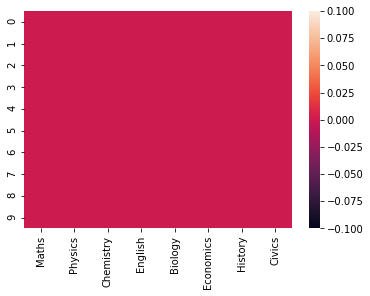

In [14]:
#data Visualization
#to check missing values
sns.heatmap(res.isnull())

In [15]:
res.isnull().sum()

Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

Dataset has no missing values
if there were any , it will notice in figure by diffrent color shade

In [16]:
#To check correlation
dfcorr = res.corr()
dfcorr

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


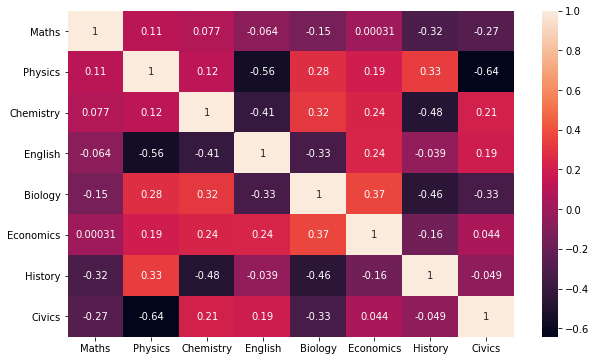

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcorr, annot=True)

In [18]:
#Plotting outliers using plot.box
res.columns

Index(['Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'Economics',
       'History', 'Civics'],
      dtype='object')

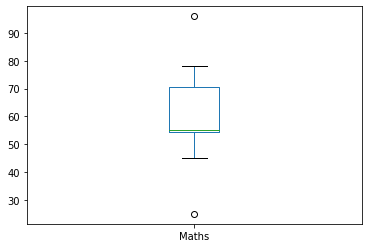

In [19]:
res['Maths'].plot.box()

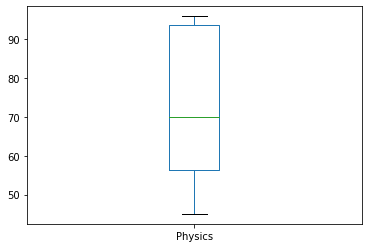

In [20]:
res['Physics'].plot.box()

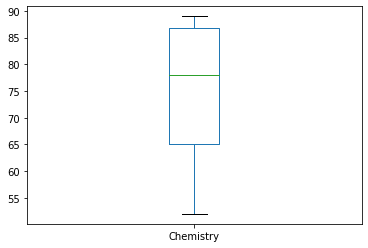

In [21]:
res['Chemistry'].plot.box()

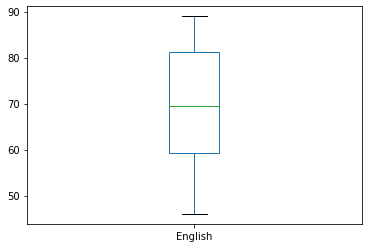

In [22]:
res['English'].plot.box()

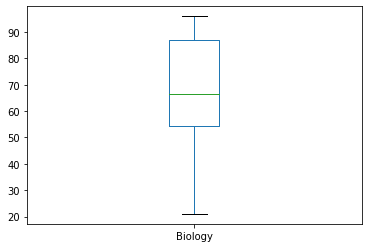

In [23]:
res['Biology'].plot.box()

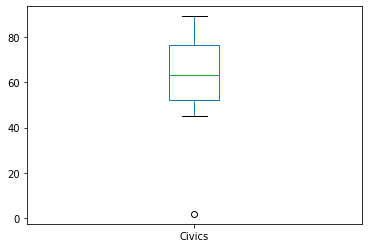

In [24]:
res['Civics'].plot.box()

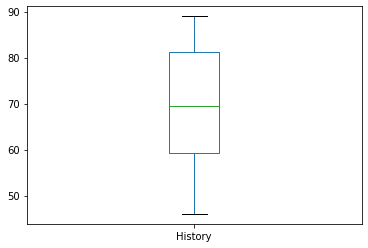

In [25]:
res['History'].plot.box()

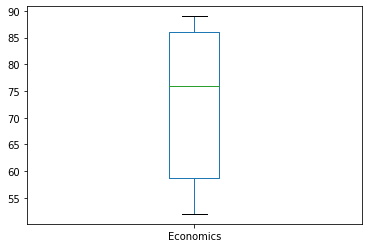

In [26]:
res['Economics'].plot.box()

From plotbox - we can see that Maths and Civics column presnt outliers

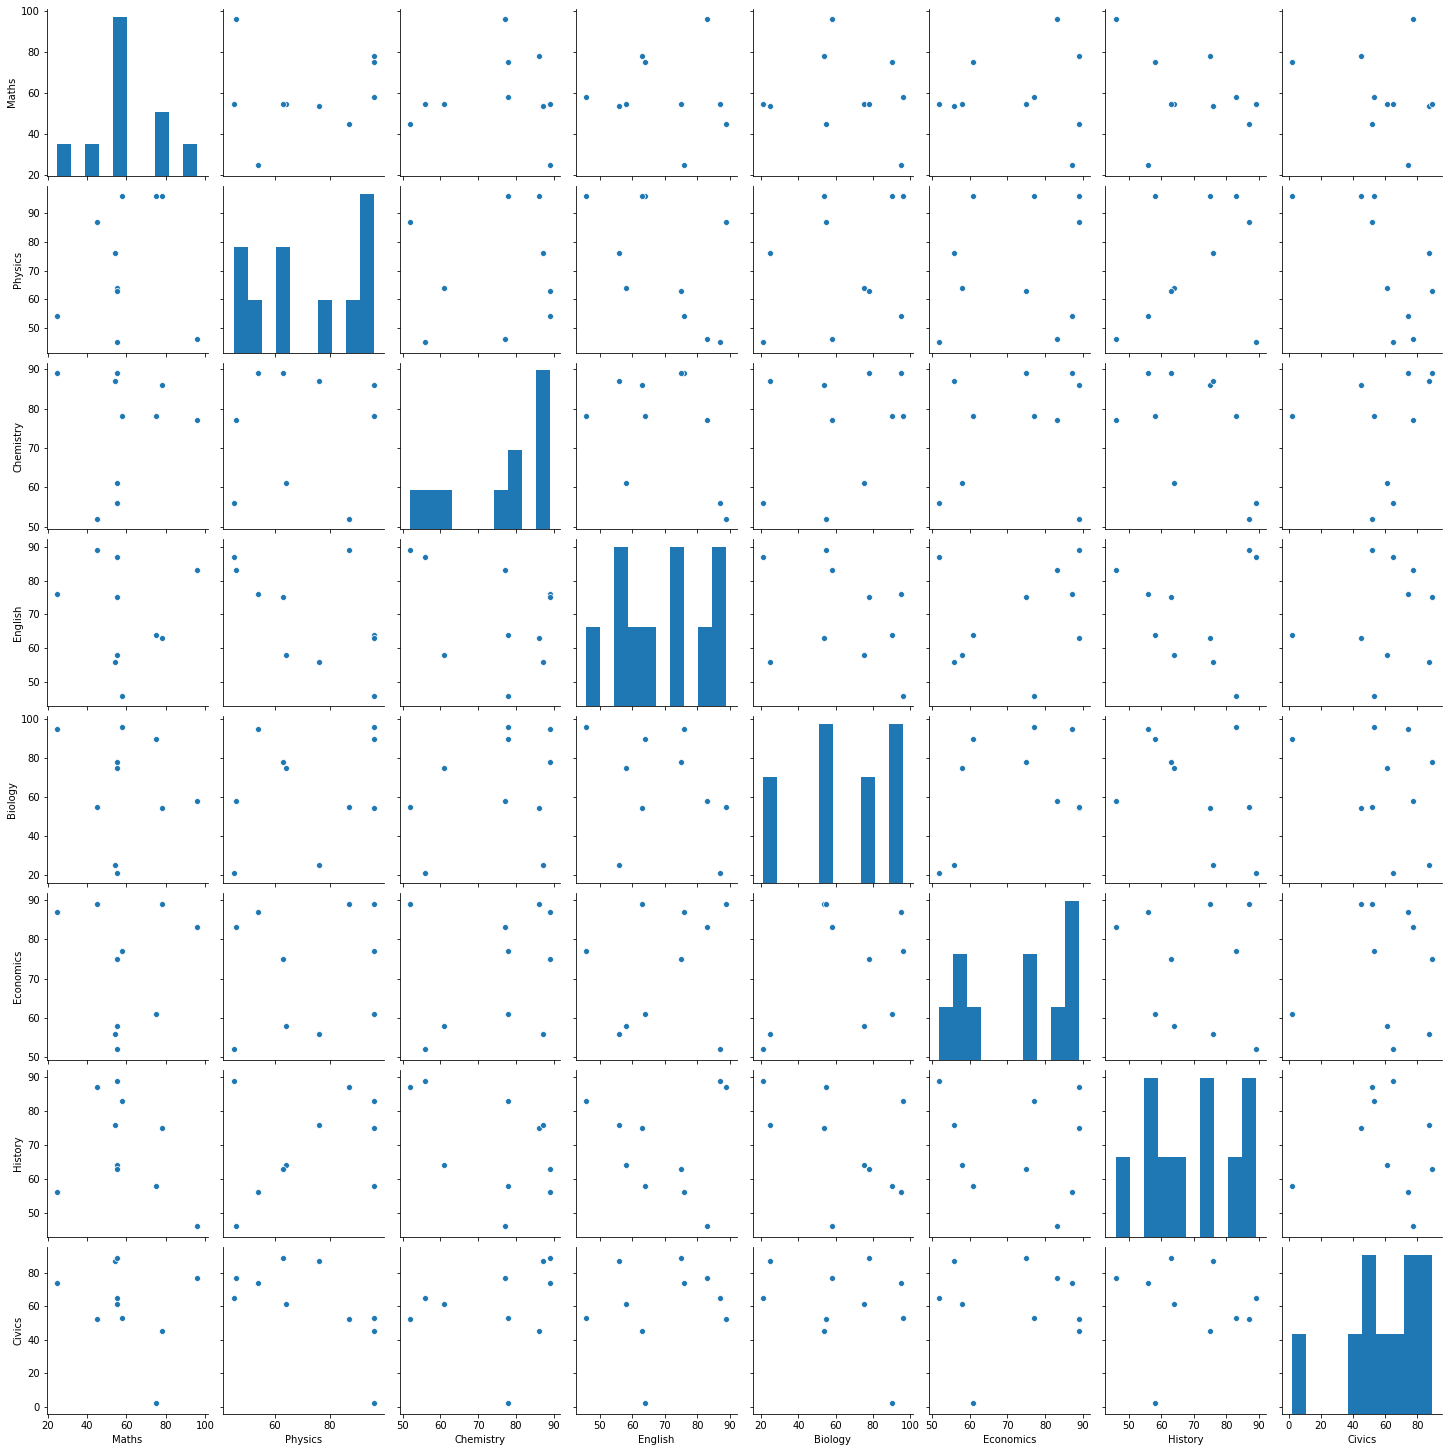

In [27]:
sns.pairplot(res)

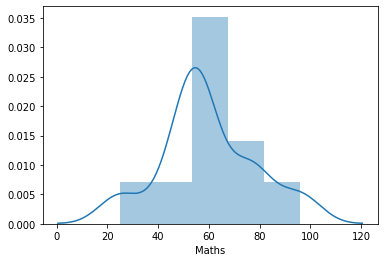

In [28]:
#checking skewness
sns.distplot(res['Maths'])

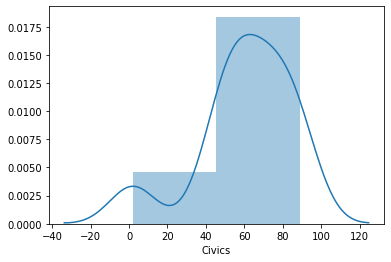

In [29]:
sns.distplot(res['Civics'])

In [30]:
#Plot all in one rows
collist = res.columns.values
print(collist)
ncol = 8
nrows = 10

['Maths' 'Physics' 'Chemistry' 'English' 'Biology' 'Economics' 'History'
 'Civics']


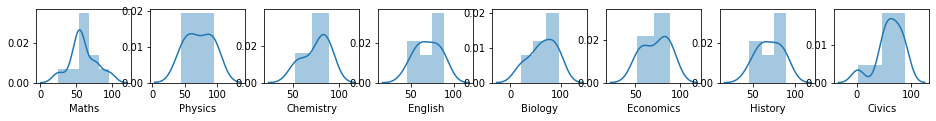

In [31]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(res[collist[i]])

In [32]:
res.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [33]:
for col in res.columns:
    if res.skew().loc[col]>0.55:
        res[col] = np.log1p(res[col])

In [34]:
res.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [35]:
#removing outliers
from scipy.stats import zscore
z =abs(zscore(res))
print(res.shape)
res_fin = res.loc[(z<3).all(axis=1)]
print(res_fin.shape)

(10, 8)
(10, 8)


In [36]:
print(res_fin)

   Maths  Physics  Chemistry  English  Biology  Economics  History  Civics
0     55       45         56       87       21         52       89      65
1     75       96         78       64       90         61       58       2
2     25       54         89       76       95         87       56      74
3     78       96         86       63       54         89       75      45
4     58       96         78       46       96         77       83      53
5     45       87         52       89       55         89       87      52
6     55       64         61       58       75         58       64      61
7     54       76         87       56       25         56       76      87
8     55       63         89       75       78         75       63      89
9     96       46         77       83       58         83       46      77


In [37]:
print(res_fin.shape)

(10, 8)


Remarks
1. as we can see boxplot mostly students got more than average marks in repective subjects.
(we can find majority of student got marks)
2. very less students got very less marks 
3. no null presnt in dataset